# ACT 2020 Coursework 2

An upload link will be provided on Moodle. Please upload a single notebook if possible. In class we mostly used scikit-learn, but you can use other packages if they're installed on sciserver (or easy to install).

## Pulsar tasks

1. Start with simple classifiers like Gaussian Naive Bayes and/or K-Neighbors. How well do those perform?
2. Now try at least two other classifiers - pick from Logistic Regression, Random Forest, Support Vector Classifier, and Multi-Layer Perceptron. Use cross-validation on the training set to tune the parameters of the classifier.
3. Make a confusion matrix for your best classifier on the validation set. Briefly discuss the two types of errors, and what each one means for the ability of this classifier to search for new pulsars.
4. Optional - Use clustering or nonlinear dimensionality reduction to find different subclasses of pulsars or of the RFI.

## Superconductor tasks

1. Start with a simple Linear Regression. How well does it predict the critical temperature?
2. Try at least one other type of regression, like regularized regression with polynomial features, or Multi-Layer Perceptron Regression.
3. Look at the residuals of the model on the validation set. Can you characterize things like the mean-square error? Is the error roughly Gaussian or does it have outliers?
4. Briefly discuss how you might use this to discover better materials for superconductivity.

## Grading Scheme

### Pulsar classification

 * Load and split dataset 10
 * Use simple classifiers 10
 * Tune more complicated classifiers with cross-validation 15
 * Confusion matrix 5
 * Discussion of results 10

### Superconductor regression

 * Load and split dataset 10
 * Use linear regression 10
 * Use more sophisticated method 15
 * Characterise residuals 10
 * Discussion of how this can be used 5
 
Marks will not be given based on accuracy of ML models, just on whether they are applied correctly and whether discussion is correct. Answers can all be in the notebook, only a few paragraphs; no need to write a paper.

In [77]:
pip install --upgrade scikit-learn

     |████████████████████████████████| 22.3MB 19.2MB/s eta 0:00:01                 | 8.0MB 8.5MB/s eta 0:00:02    |█████████████                   | 9.0MB 8.5MB/s eta 0:00:02     |██████████████▌                 | 10.1MB 8.5MB/s eta 0:00:02███████████▊                | 11.0MB 8.5MB/s eta 0:00:02 |█████████████████▍              | 12.1MB 8.5MB/s eta 0:00:0213.0MB 8.5MB/s eta 0:00:02   |████████████████████▎           | 14.1MB 19.2MB/s eta 0:00:01�██████████          | 15.4MB 19.2MB/s eta 0:00:01��███████████▏      | 17.5MB 19.2MB/s eta 0:00:01    |██████████████████████████████▌ | 21.2MB 19.2MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.24.0
    Uninstalling scikit-learn-0.24.0:
      Successfully uninstalled scikit-learn-0.24.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Here are some possibly helpful imports
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
from mpl_toolkits import mplot3d

import numpy as np
from numpy import math
import seaborn as sns; sns.set()
from pandas import DataFrame
import pandas as pd

import numpy as np
import scipy.stats as stats
import pylab as pl
from scipy.stats import norm
from scipy.optimize import curve_fit

# Some sklearn tools
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Some classifiers and decompositions
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

from sklearn.metrics import max_error
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [422]:
pulsar_data = pd.read_csv("HTRU_2_updated.csv",sep=',')

In [423]:
pulsar_data.head()

,A,B,C,D,E,F,G,H,I
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [424]:
len(pulsar_data)

17898

In [425]:
X_pulsar = pulsar_data.drop('I', axis=1)
y_pulsar = pulsar_data['I']

In [426]:
target_names = ['RFI' , 'Pulsar']

In [427]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_pulsar, y_pulsar,
                                                random_state=1, train_size = 0.9, stratify = y_pulsar)

In [428]:
rs = RobustScaler()
Xtrain = rs.fit_transform(Xtrain)
Xtest = rs.transform(Xtest)

Number of pulsars in data set.

In [429]:
pulsar_data['I'].sum()
print("Number of Pulsars in data set: %0.2f" % (pulsar_data['I'].sum()))

Number of Pulsars in data set: 1639.00


Number of RFIs in data set.

In [430]:
len(pulsar_data) - 1639
print("Number of RFIs in data set: %0.2f" % (len(pulsar_data) - 1639))

Number of RFIs in data set: 16259.00


In [431]:
ytest.sum()
print("Number of Pulsars in ytest set: %0.2f" % (ytest.sum()))

Number of Pulsars in ytest set: 164.00


In [432]:
len(ytest) - ytest.sum()
print("Number of RFIs in ytest set: %0.2f" % (len(ytest) - ytest.sum()))

Number of RFIs in ytest set: 1626.00


/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


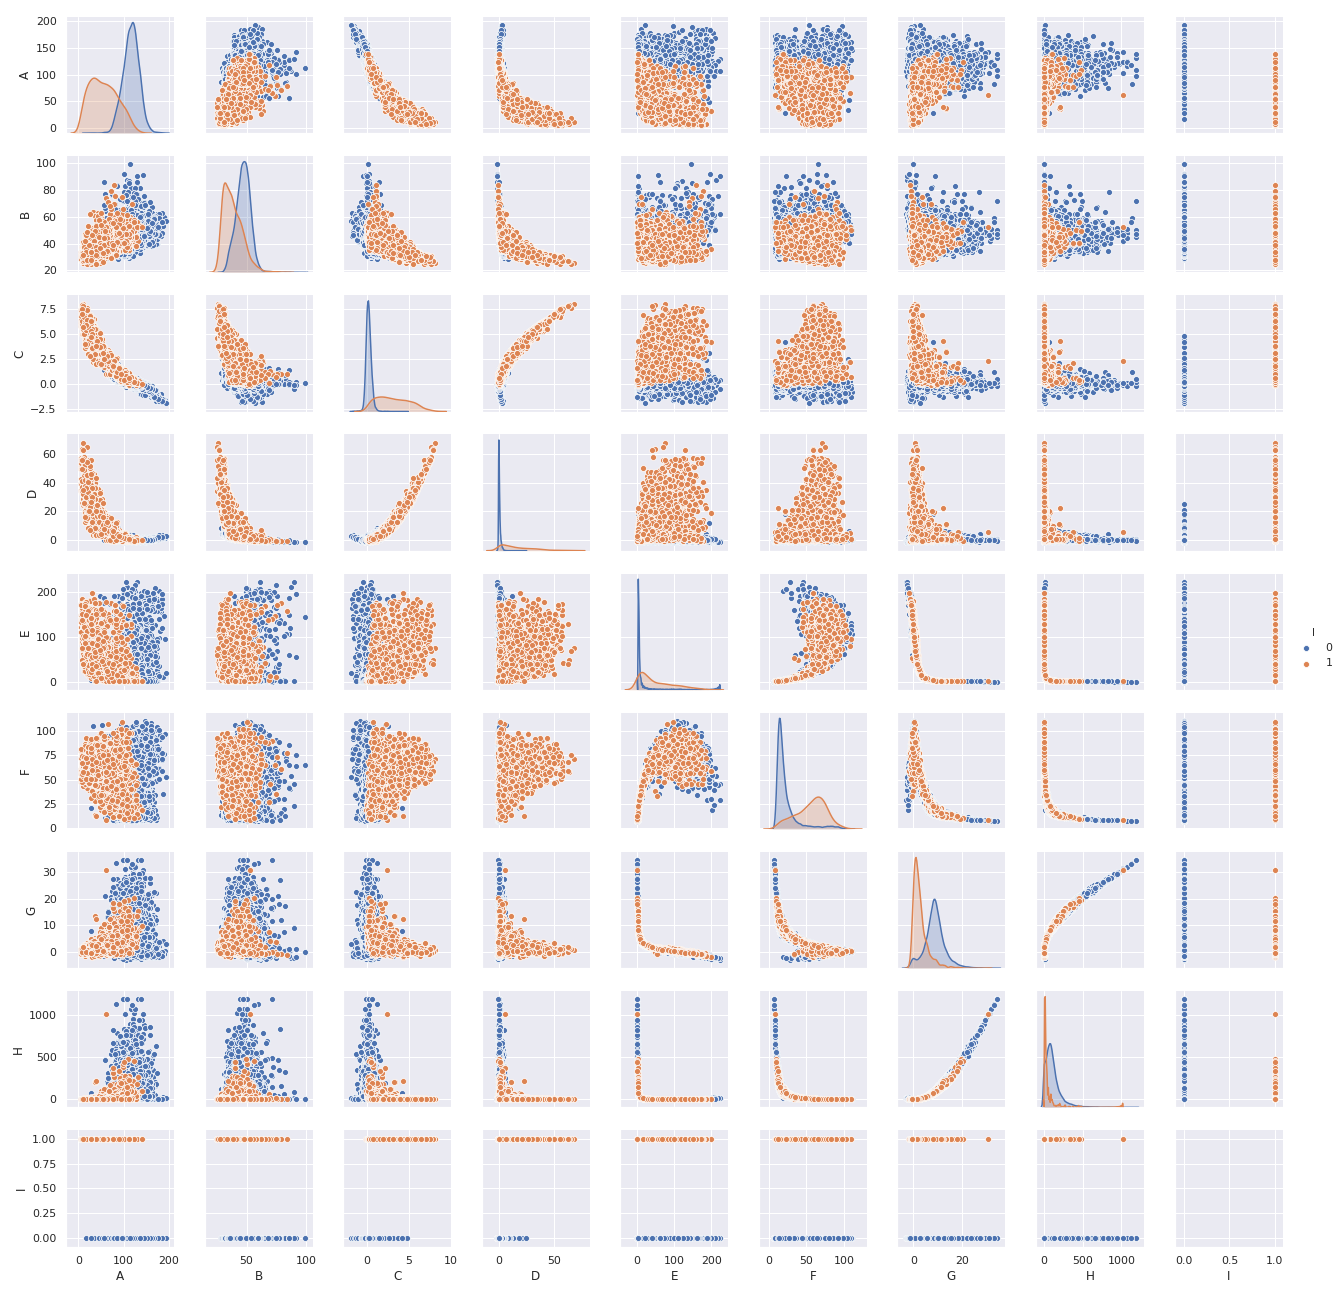

In [262]:
sns.pairplot(pulsar_data, hue='I', height=2)

In [10]:
def plot_matrix(ytest, y_model, figsize=(5,5)):
    cm = confusion_matrix(ytest, y_model, labels=np.unique(ytest))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(ytest), columns=np.unique(ytest))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "Purples", annot=annot, fmt='', ax=ax).set_title("Confusion Matrix of Pulsars(1) and RFI(0)")
    
    
# From https://www.kaggle.com/agungor2/various-confusion-matrix-plots#2.-Seaborn-Heatmap-More-Analysis- 

# Gaussian model

In [80]:
model = GaussianNB()
model

GaussianNB()

In [81]:
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [82]:
accuracy_score(ytest, y_model)

0.9463687150837988

In [83]:
matrix = confusion_matrix(ytest, y_model)
matrix

array([[1554,   72],
       [  24,  140]])

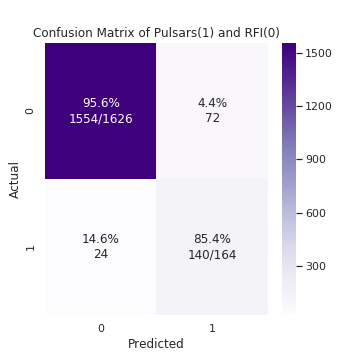

In [84]:
plot_matrix(ytest,y_model)

In [85]:
errorRFI = abs(((matrix[0,0]-1623)/1623)*100)
print("This is the percentage error of detecting RFIs: %0.2f" % (errorRFI.mean()))
errorPulsar = abs(((matrix[1,1]-167)/167)*100)
print("This is the percentage error of detecting Pulsars: %0.2f" % (errorPulsar.mean()))

This is the percentage error of detecting RFIs: 4.25
This is the percentage error of detecting Pulsars: 16.17


In [86]:
print(classification_report(ytest, y_model, target_names = target_names))

              precision    recall  f1-score   support

         RFI       0.98      0.96      0.97      1626
      Pulsar       0.66      0.85      0.74       164

    accuracy                           0.95      1790
   macro avg       0.82      0.90      0.86      1790
weighted avg       0.96      0.95      0.95      1790



This clearly shows the model used here is much better at detecting RFIs than it is Pulsars.

# K-neighbors model

In [24]:
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [25]:
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [26]:
accuracy_score(ytest, y_model)

0.9815642458100559

In [27]:
matrix = confusion_matrix(ytest, y_model)
matrix

array([[1616,   10],
       [  23,  141]])

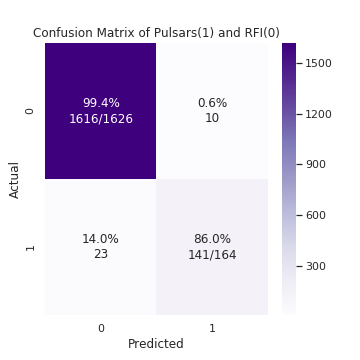

In [28]:
plot_matrix(ytest,y_model)

In [29]:
errorRFI = abs(((matrix[0,0]-1623)/1623)*100)
print("This is the percentage error of detecting RFIs: %0.2f" % (errorRFI.mean()))
errorPulsar = abs(((matrix[1,1]-167)/167)*100)
print("This is the percentage error of detecting Pulsars: %0.2f" % (errorPulsar.mean()))

This is the percentage error of detecting RFIs: 0.43
This is the percentage error of detecting Pulsars: 15.57


In [30]:
print(classification_report(ytest, y_model, target_names = target_names))

              precision    recall  f1-score   support

         RFI       0.99      0.99      0.99      1626
      Pulsar       0.93      0.86      0.90       164

    accuracy                           0.98      1790
   macro avg       0.96      0.93      0.94      1790
weighted avg       0.98      0.98      0.98      1790



This clearly shows the model used here is much better at detecting RFIs than it is Pulsars.

# Logistic Regression

In [53]:
model = LogisticRegression()
model

LogisticRegression()

In [54]:
model.fit(Xtrain, ytrain)               
y_model = model.predict(Xtest)

In [55]:
accuracy_score(ytest, y_model)

0.9787709497206704

In [56]:
matrix = confusion_matrix(ytest, y_model)
matrix

array([[1615,   11],
       [  27,  137]])

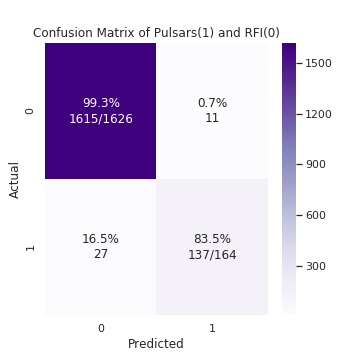

In [57]:
plot_matrix(ytest,y_model)

In [58]:
errorRFI = abs(((matrix[0,0]-1623)/1623)*100)
print("This is the percentage error of detecting RFIs: %0.2f" % (errorRFI.mean()))
errorPulsar = abs(((matrix[1,1]-167)/167)*100) 
print("This is the percentage error of detecting Pulsars: %0.2f" % (errorPulsar.mean()))

This is the percentage error of detecting RFIs: 0.49
This is the percentage error of detecting Pulsars: 17.96


In [59]:
print(classification_report(ytest, y_model, target_names = target_names))

              precision    recall  f1-score   support

         RFI       0.98      0.99      0.99      1626
      Pulsar       0.93      0.84      0.88       164

    accuracy                           0.98      1790
   macro avg       0.95      0.91      0.93      1790
weighted avg       0.98      0.98      0.98      1790



This clearly shows the model used here is much better at detecting Pulsars than it is RFIs.

# Validation Curve for Logistic Regression

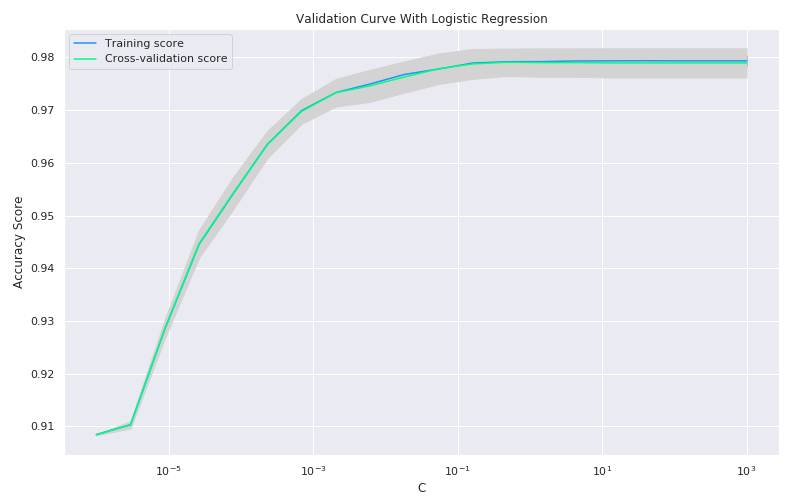

In [129]:
param_range = np.logspace(-6, 3, 20)

train_scores, test_scores = validation_curve(model, Xtrain, ytrain, param_name="C",
                                             param_range=param_range, cv=4, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(11,7))
plt.plot(param_range, train_mean, label="Training score", color="dodgerblue")
plt.plot(param_range, test_mean, label="Cross-validation score", color="springgreen")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="teal")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="lightgrey")
 
plt.title("Validation Curve With Logistic Regression")
plt.xlabel("C")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.xscale("log")
plt.show()

#from https://www.dezyre.com/recipes/plot-validation-curve-in-python

### From this it can be seen that changing C doesnt have a great effect on the model.
### It is also clear that the standard deviation is extreme in this case.

# Random Forest model

### Using GridSearchCV, optimal parametres were found for the RandomForestClassifier. More steps were done but have been cut for better presentation.

In [346]:
parameter_grid = [
    {"max_depth" : [58,59],
     "n_estimators" : [62,68],
     "bootstrap" : [False],
     "class_weight" : ["balanced", "balanced_subsample", None],
     "criterion" : ["gini"],
     "min_samples_leaf" : [97,100],
     "max_features" : ["auto"],
     "max_leaf_nodes" : [34,35]
     }
]

# initialize the model with the parameter grid
model = model_selection.GridSearchCV(ensemble.RandomForestClassifier(),
                                            parameter_grid,
                                            cv = 3,
                                            scoring = "recall"
                                            )

In [ ]:
#{'bootstrap': False,
# 'class_weight': 'balanced',
# 'criterion': 'gini',
# 'max_depth': 58,
# 'max_features': 'auto',
 #'max_leaf_nodes': 34,
# 'min_samples_leaf': 97,
# 'n_estimators': 68}

In [13]:
parameter_grid = [
    {"max_depth" : [58,59],
     "n_estimators" : [65,70],
     "bootstrap" : [False],
     "class_weight" : ["balanced", "balanced_subsample", None],
     "criterion" : ["gini"],
     "min_samples_leaf" : [98,99],
     "max_features" : ["auto"],
     "max_leaf_nodes" : [34,35]
     }
]

# initialize the model with the parameter grid
model = model_selection.GridSearchCV(ensemble.RandomForestClassifier(),
                                            parameter_grid,
                                            cv = 3,
                                            scoring = "recall"
                                            )

In [309]:
model.best_params_

{'bootstrap': False,
 'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': 58,
 'max_features': 'auto',
 'max_leaf_nodes': 34,
 'min_samples_leaf': 99,
 'n_estimators': 65}

In [60]:
model = RandomForestClassifier(max_depth = 59, criterion = 'gini', n_estimators = 65, min_samples_leaf = 98,
                               max_features = "auto", max_leaf_nodes = 35)
model

RandomForestClassifier(max_depth=59, max_leaf_nodes=35, min_samples_leaf=98,
                       n_estimators=65)

In [61]:
%%time
model.fit(Xtrain, ytrain)

CPU times: user 2.29 s, sys: 3.02 ms, total: 2.3 s
Wall time: 2.29 s


RandomForestClassifier(max_depth=59, max_leaf_nodes=35, min_samples_leaf=98,
                       n_estimators=65)

In [62]:
%%time
y_model = model.predict(Xtest)

CPU times: user 37.9 ms, sys: 3.39 ms, total: 41.2 ms
Wall time: 37 ms


In [63]:
accuracy_score(ytest, y_model)

0.9770949720670391

In [64]:
matrix = confusion_matrix(ytest, y_model)
matrix

array([[1612,   14],
       [  27,  137]])

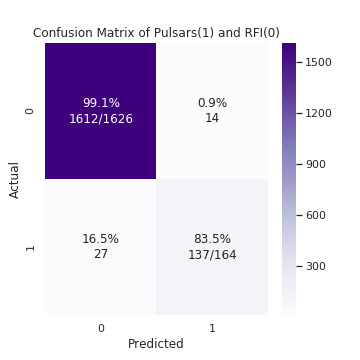

In [65]:
plot_matrix(ytest,y_model)

In [66]:
errorRFI = abs(((matrix[0,0]-1623)/1623)*100)
print("This is the percentage error of detecting RFIs: %0.2f" % (errorRFI.mean()))
errorPulsar = abs(((matrix[1,1]-167)/167)*100)
print("This is the percentage error of detecting Pulsars: %0.2f" % (errorPulsar.mean()))

This is the percentage error of detecting RFIs: 0.68
This is the percentage error of detecting Pulsars: 17.96


In [67]:
print(classification_report(ytest, y_model, target_names = target_names))

              precision    recall  f1-score   support

         RFI       0.98      0.99      0.99      1626
      Pulsar       0.91      0.84      0.87       164

    accuracy                           0.98      1790
   macro avg       0.95      0.91      0.93      1790
weighted avg       0.98      0.98      0.98      1790



This clearly shows the model used here is much better at detecting Pulsars than it is RFIs.

# Validation Curve for Random Forest

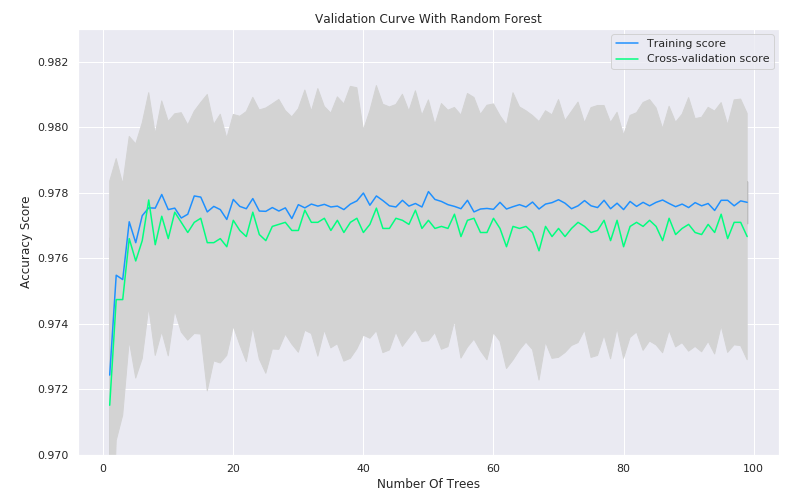

In [131]:
param_range = np.arange(1, 100, 1)

train_scores, test_scores = validation_curve(RandomForestClassifier(max_depth = 59, criterion = 'gini', min_samples_leaf = 98,
                               max_features = "auto", max_leaf_nodes = 35), Xtrain, ytrain, param_name="n_estimators",
                                             param_range=param_range, cv=8, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(11,7))
plt.plot(param_range, train_mean, label="Training score", color="dodgerblue")
plt.plot(param_range, test_mean, label="Cross-validation score", color="springgreen")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="lightgrey")
 
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.ylim(0.97,0.983)
plt.show()


#from https://www.dezyre.com/recipes/plot-validation-curve-in-python

### From this a good fit can be seen. It can also be seen that having any more than around 30 trees is not needed as no further improvement is seen. 

# Gradient Boosting Classifier

In [201]:
model = GradientBoostingClassifier(n_estimators=27, learning_rate = 0.5, min_samples_leaf = 5)
model

GradientBoostingClassifier(learning_rate=0.5, min_samples_leaf=5,
                           n_estimators=27)

In [202]:
model.fit(Xtrain, ytrain.astype(int))
y_model = model.predict(Xtest)

In [203]:
accuracy_score(ytest, y_model)

0.9770949720670391

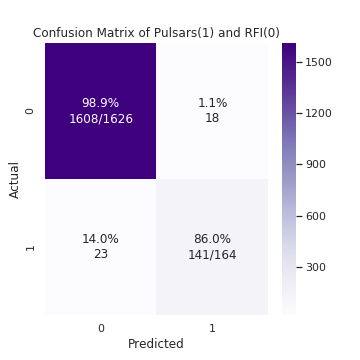

In [204]:
plot_matrix(ytest,y_model)

In [206]:
print(classification_report(ytest, y_model, target_names = target_names))

              precision    recall  f1-score   support

         RFI       0.99      0.99      0.99      1626
      Pulsar       0.89      0.86      0.87       164

    accuracy                           0.98      1790
   macro avg       0.94      0.92      0.93      1790
weighted avg       0.98      0.98      0.98      1790



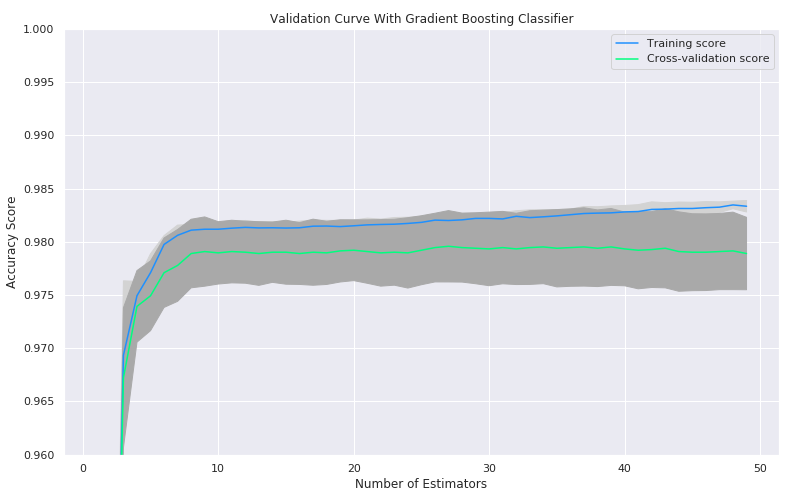

In [211]:
param_range = np.arange(0, 50, 1)

train_scores, test_scores = validation_curve(GradientBoostingClassifier(learning_rate = 0.15, min_samples_leaf = 5), 
                                             Xtrain, ytrain, param_name="n_estimators",
                                             param_range=param_range, cv=6, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(11,7))
plt.plot(param_range, train_mean, label="Training score", color="dodgerblue")
plt.plot(param_range, test_mean, label="Cross-validation score", color="springgreen")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="lightgrey")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="darkgrey")
 
plt.title("Validation Curve With Gradient Boosting Classifier")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.ylim(0.96,1)
plt.show()

#from https://www.dezyre.com/recipes/plot-validation-curve-in-python

# Cross Validation

In [318]:
model = MLPClassifier(hidden_layer_sizes = (10,10,10), max_iter=300)
scores = cross_val_score(model, X_pulsar, y_pulsar, cv=3)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.97 accuracy with a standard deviation of 0.00


Here I have tried to optimise the MLPClassifier by defining hidden layers and increasing the number of times the classifer runs through the data.

In [239]:
model = RandomForestClassifier(n_estimators=12, warm_start = True)
scores = cross_val_score(model, X_pulsar, y_pulsar, cv=3)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.00


The number of trees used has been reduced from the default 100 to 25. This means the classifier is able to run much faster without loss to accuracy. Warm_start has also been activated. This reuses the solution of the previous call to fit and add more estimators to the ensemble.

In [434]:
model = LogisticRegression(C=1)
scores = cross_val_score(model, X_pulsar, y_pulsar, cv=3)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

0.98 accuracy with a standard deviation of 0.00


/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [437]:
model = LogisticRegression(C=100)
scores = cross_val_score(model, X_pulsar, y_pulsar, cv=3)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

0.98 accuracy with a standard deviation of 0.00


/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Changing hyperparametre, C, has seemingly no effect on the accuracy of the LogisticRegression method.

# Confusion Matrix

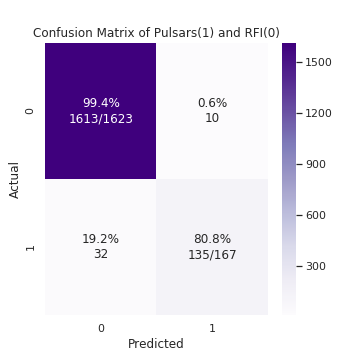

In [230]:
plot_matrix(ytest,y_model)

This is the confusion matrix from the best model (MLPClassifier).

The top left value is the True Negatives, top right is the False Negatives.

Bottom left is the False Positives, bottom right is the True Positives.

The two errors here are the False Positives and the False Negatives. 

- False Positive is where the classifier has identified a pulsar as an RFI.

- False Negative is where the classifier has identified an RFI as a pulsar.

As can be seen for all the classifiers used here, they get more False Negatives as a percentage size than the False Positives. This indicates that it is more difficult for them to identify True Negatives than it is True Positives.

# Results

### Pulsar detection
- It is clear that all the models find it more diffcult to find, and then verify, pulsars compared to RFIs. The classification report shows this, with recall always higher for RFIs than pulsars, and precision also consistently higher for RFIs independant of classifier used (at least in this notebook).
- Looking at the confusion matrix for the Gradient Boosting classifier, the model correctly labelled 1608 out of the 1626 RFIs, while labelling 18 as pulsars. It also correctly labelled 141 out of 164 pulsars, whilst labelling 23 pulsars as RFIs. 
- This result of misidentifying pulsars more often than RFIs is consistent across all models used.
- This error in finding pulsars could be due to the far fewer pulsars in the data set, while there is a plentiful number of RFIs (roughly 10 times more RFIs). This means when the model is trained, it is trained better to find RFIs than pulsars. This could be rectified by having the same number of pulsars and RFIs in the training set. Then there would be no bias toward RFIs.

### Optimisation
- The poor increase in performance, once the models have been optimised, could be due to the nature of the data. As there are only two answers, pulsar or not pulsar, increasing the precison or 'decison making' would have a small affect, meaning deminishing results with each optimised parametre.


### Best Model
- The best performing model was the K-neighbours and Gradient Boosting classifier. They both performed similarly, having the highest recall rates for both pulsars and RFIs, 0.86 and 0.99 respectively. They also had the highest coresponding precision along with accuracy.

# Finding subclasses in Pulsar Data

In [175]:
Pulsar_1 = pulsar_data[pulsar_data['I'] > 0]

In [176]:
Pulsar_0 = pulsar_data[pulsar_data['I'] < 1]

In [177]:
Pulsar_1 = np.array(Pulsar_1)
Pulsar_0 = np.array(Pulsar_0)

In [182]:
model = KMeans(n_clusters = 2, random_state=1)
model

KMeans(n_clusters=2, random_state=1)

In [183]:
model.fit(Pulsar_1)
y_model = model.predict(Pulsar_1)

In [184]:
centres = model.cluster_centers_
centres

array([[35.98083187, 37.23733961,  4.36708849, 23.74590159, 92.45550544,
        71.76207686,  0.55979164, -0.13904561,  1.        ],
       [72.51831607, 39.8365548 ,  2.18569575,  9.29248761, 17.2458527 ,
        44.78100723,  4.43636527, 31.74254597,  1.        ]])

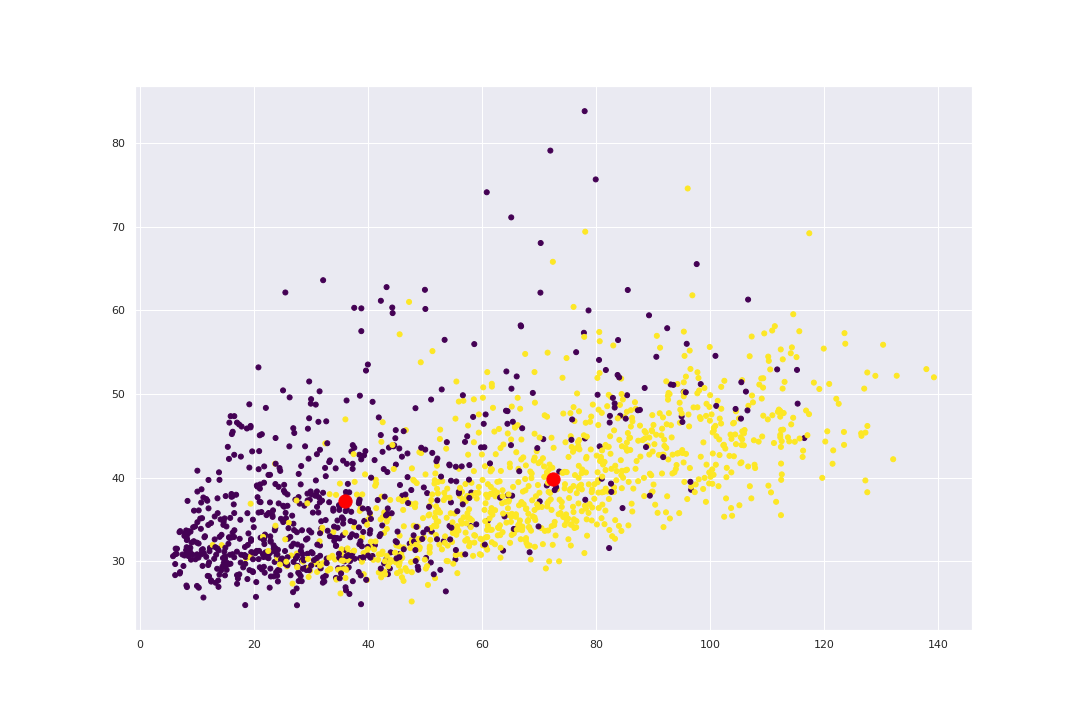

In [207]:
plt.figure(figsize = (15,10))

plt.scatter(Pulsar_1[:, 0], Pulsar_1[:, 1], c = y_model, cmap = 'viridis', s = 25)

plt.scatter(centres[:, 0], centres[:, 1], c = 'red', s = 175)

## No distinguished groups in the pulsar data.

In [159]:
model.fit(Pulsar_0)
y_model = model.predict(Pulsar_0)

In [160]:
centres = model.cluster_centers_
centres

array([[1.14430574e+02, 4.65667239e+01, 2.38682114e-01, 4.55101268e-01,
        1.10247717e+00, 1.13651714e+01, 1.59030719e+01, 3.13497319e+02,
        0.00000000e+00],
       [1.16909243e+02, 4.74653712e+01, 2.05850178e-01, 3.68775719e-01,
        1.01245380e+01, 2.52256753e+01, 7.71847058e+00, 8.11364051e+01,
        0.00000000e+00]])

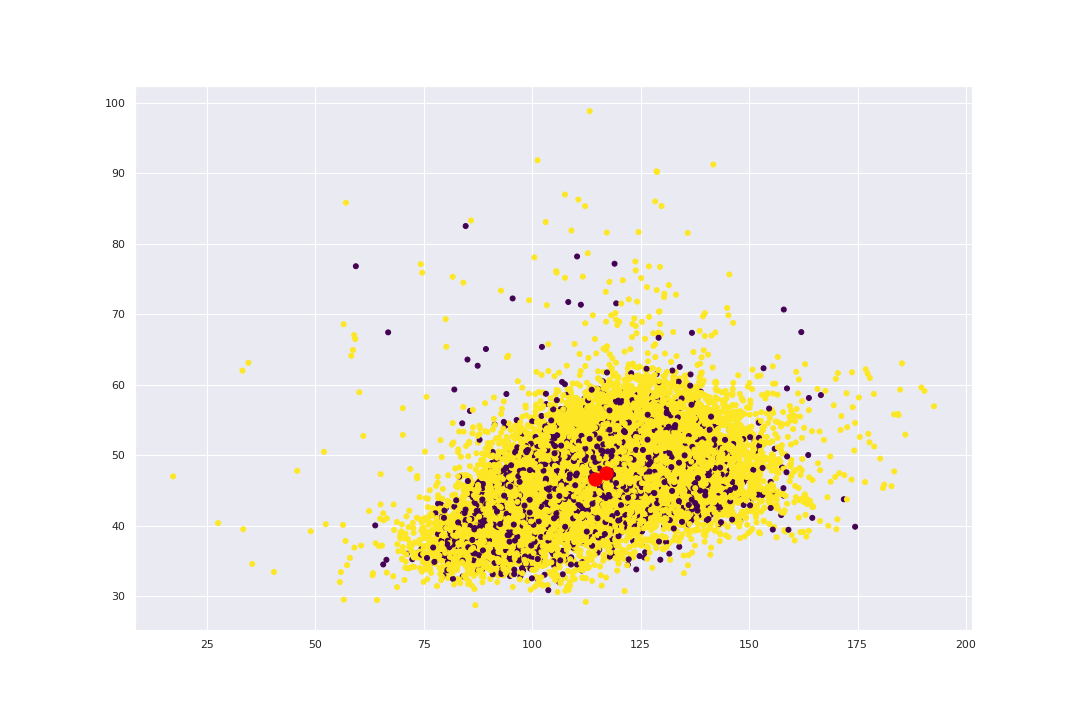

In [161]:
plt.figure(figsize = (15,10))

plt.scatter(Pulsar_0[:, 0], Pulsar_0[:, 1], c = y_model, cmap = 'viridis', s = 25)

plt.scatter(centres[:, 0], centres[:, 1], c = 'red', s = 175)

## This shows that the RFI data has no distinguished groups.

# Using Spectral Clustering

In [186]:
model = SpectralClustering(n_clusters = 2, affinity='nearest_neighbors', n_init=100, assign_labels='kmeans')
model

SpectralClustering(affinity='nearest_neighbors', n_clusters=2, n_init=100)

In [187]:
model.fit(Pulsar_1)
y_model = model.fit_predict(Pulsar_1)

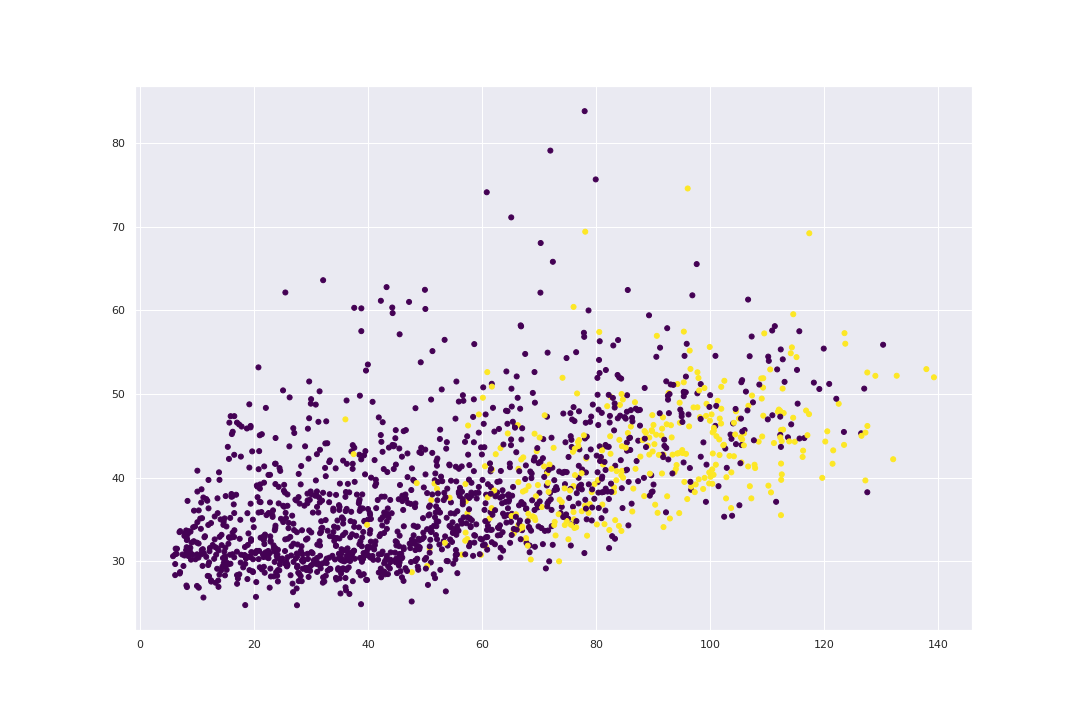

In [188]:
plt.figure(figsize = (15,10))

plt.scatter(Pulsar_1[:, 0], Pulsar_1[:, 1], c = y_model, cmap = 'viridis', s = 25)

## This is similar to the KMeans result and both show there is no real sublasses to be detecting, at least using these methods.

## In both cases there dont appear to be any seperate groups within both classes. However deeper analysis could show groups on a deeper level.

# Super Conducting

In [5]:
SC_data = pd.read_csv("train.csv",sep=',')

In [6]:
SC_data.head(5)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [7]:
X_SC = SC_data.drop('critical_temp', axis=1)
y_SC = SC_data['critical_temp']

In [8]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_SC, y_SC,
                                                random_state=1, train_size = 0.9)

In [9]:
rs = RobustScaler()
Xtrain = rs.fit_transform(Xtrain)
Xtest = rs.transform(Xtest)

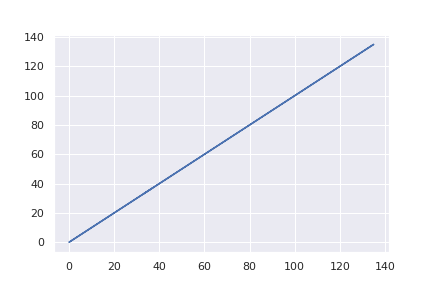

In [85]:
plt.plot(ytest.astype(int),ytest.astype(int))

# Linear Regression

In [10]:
model = LinearRegression()
model

LinearRegression()

In [11]:
model.fit(Xtrain, ytrain.astype(int))   
y_model = model.predict(Xtest)

In [12]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_model))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_model))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_model)))

Mean Absolute Error: 13.626965628660507
Mean Squared Error: 317.40281084072905
Root Mean Squared Error: 17.815802278896367


Text(0, 0.5, 'Predicted Temperature (K)')

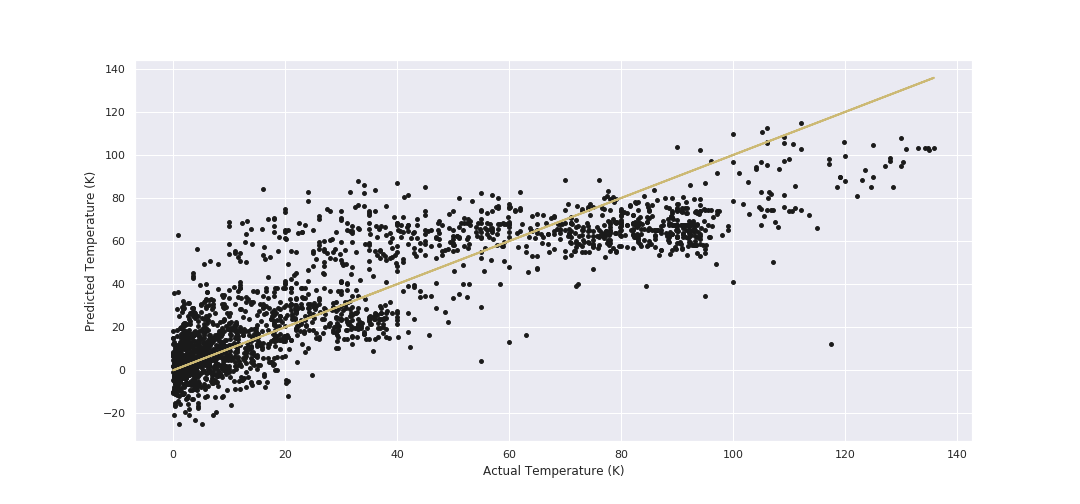

In [13]:
plt.figure(figsize = (15,7))
plt.scatter(ytest, y_model, s = 15, c = 'k')
plt.plot(ytest,ytest, c = 'y', linewidth=2.0)
plt.xlabel('Actual Temperature (K)')
plt.ylabel('Predicted Temperature (K)')

(-80, 80)

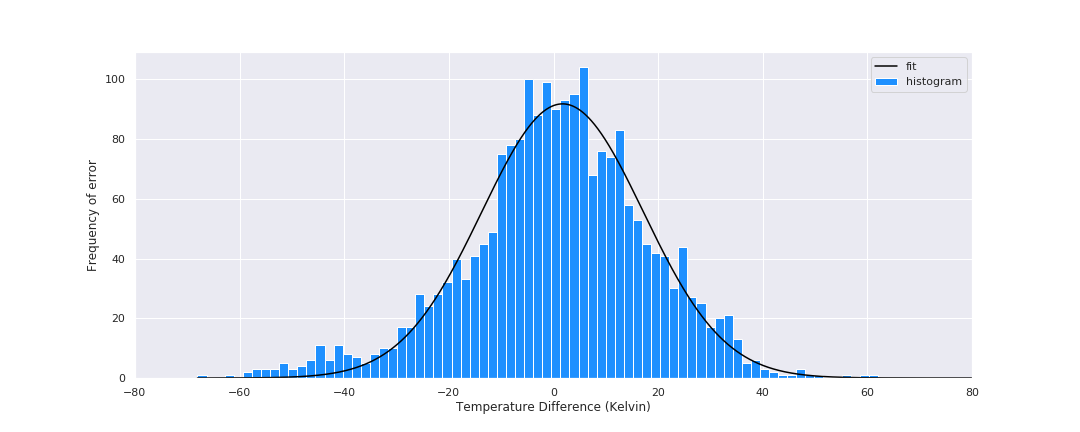

In [14]:
from scipy.optimize import curve_fit

def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)


x=ytest-y_model

plt.figure(figsize=(15,6))
bin_heights, bin_borders, _ = plt.hist(x, bins=100, label='histogram',color='dodgerblue')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='fit',color='black')
plt.legend()
plt.ylabel('Frequency of error')
plt.xlabel('Temperature Difference (Kelvin)')
plt.xlim(-80,80)

#Adapted from https://stackoverflow.com/questions/35544233/fit-a-curve-to-a-histogram-in-python

# Multi Layer Percepton Regressor

A regressor is used instead of the classifier as a regressor is better at handling continous data, rather than a classifier.

In [15]:
model = MLPRegressor(hidden_layer_sizes = (19,19,19), max_iter=1000, learning_rate_init = 0.01, warm_start=True)
model

MLPRegressor(hidden_layer_sizes=(19, 19, 19), learning_rate_init=0.01,
             max_iter=1000, warm_start=True)

In [16]:
model.fit(Xtrain, ytrain.astype(int))               
y_model = model.predict(Xtest)

In [17]:
#accuracy_score(ytest.astype(int), y_model)

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_model))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_model))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_model)))

Mean Absolute Error: 7.294611059560567
Mean Squared Error: 140.30233516632316
Root Mean Squared Error: 11.844928668688688


Text(0, 0.5, 'Predicted Temperature (K)')

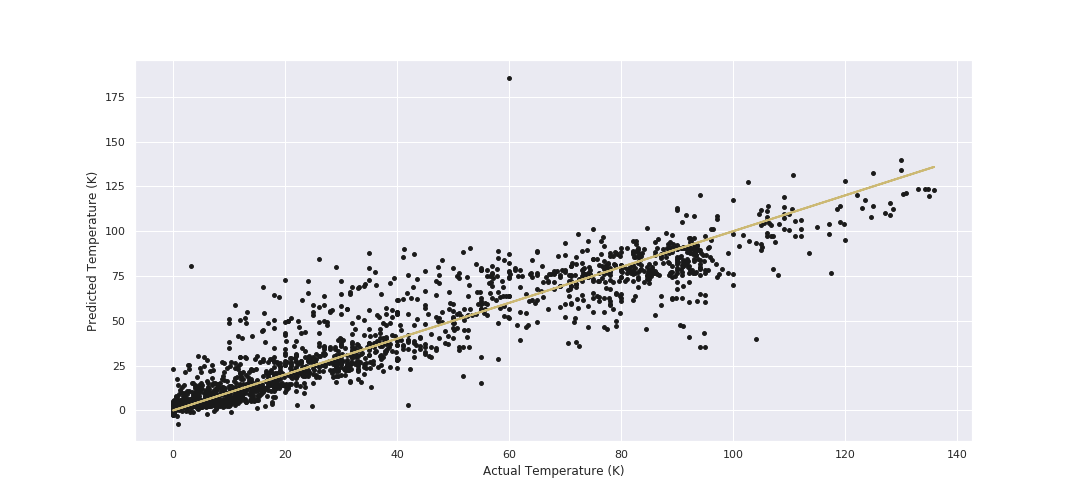

In [19]:
plt.figure(figsize = (15,7))
plt.scatter(ytest, y_model, s = 15, c = 'k')
plt.plot(ytest,ytest, c = 'y', linewidth=2.0)
plt.xlabel('Actual Temperature (K)')
plt.ylabel('Predicted Temperature (K)')

(-60, 60)

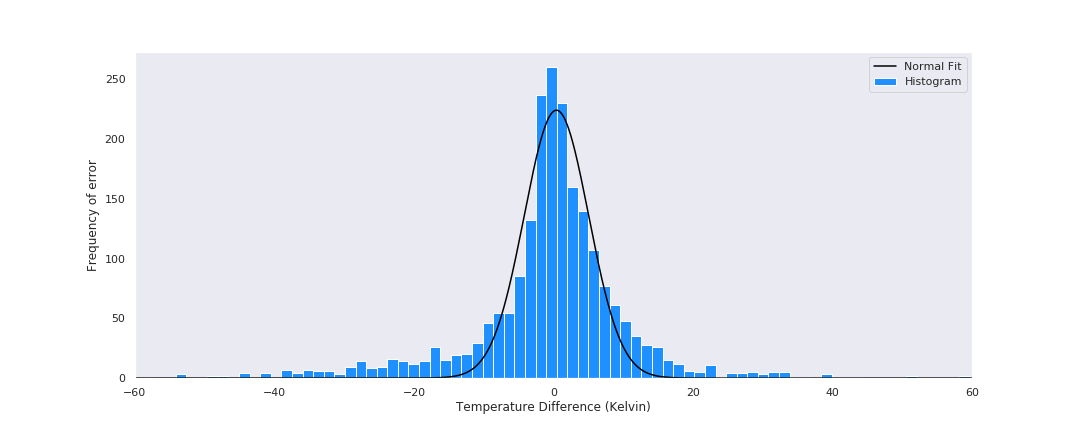

In [20]:
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)

x=ytest-y_model

plt.figure(figsize=(15,6))
bin_heights, bin_borders, _ = plt.hist(x, bins=125, label='Histogram',color='dodgerblue')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='Normal Fit',color='black')
plt.grid()
plt.xlabel('Temperature Difference (K)')
plt.legend()
plt.ylabel('Frequency of error')
plt.xlabel('Temperature Difference (Kelvin)')
plt.xlim(-60,60)
#Adapted from https://stackoverflow.com/questions/35544233/fit-a-curve-to-a-histogram-in-python

# Gaussian

In [21]:
model = GaussianNB()
model

GaussianNB()

In [22]:
model.fit(Xtrain, ytrain.astype(int))             
y_model = model.predict(Xtest)

In [23]:
accuracy_score(ytest.astype(int), y_model)

0.06017865538316878

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest,y_model))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_model))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_model)))

Mean Absolute Error: 19.156878916314056
Mean Squared Error: 835.9663941463966
Root Mean Squared Error: 28.913083442386366


Text(0, 0.5, 'Predicted Temperature (K)')

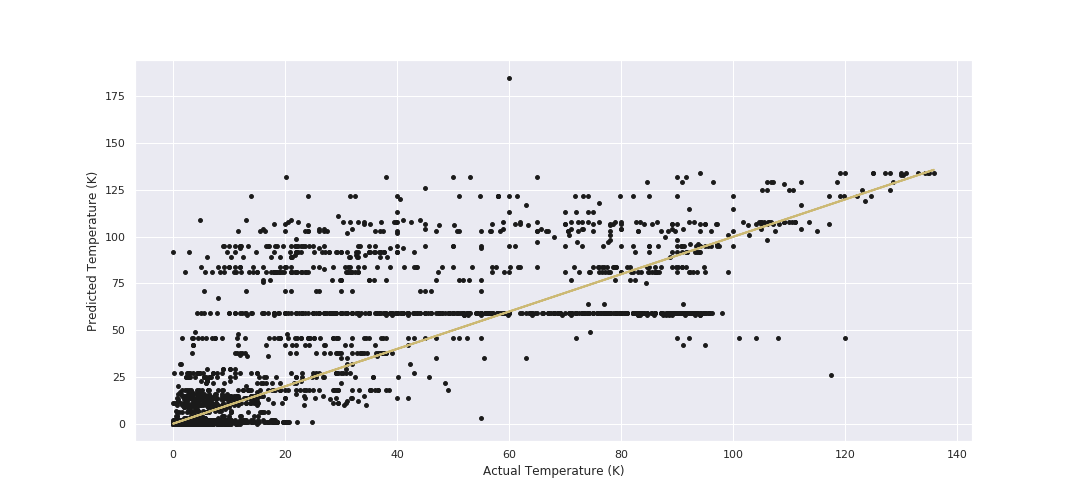

In [25]:
plt.figure(figsize = (15,7))
plt.scatter(ytest, y_model, s = 15, c = 'k')
plt.plot(ytest,ytest, c = 'y', linewidth=2.0)
plt.xlabel('Actual Temperature (K)')
plt.ylabel('Predicted Temperature (K)')

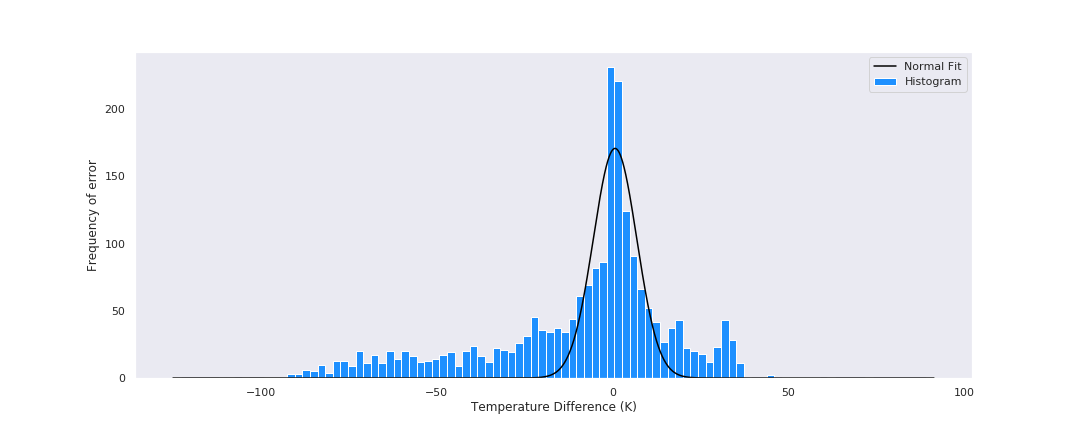

In [26]:
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)

x = ytest - y_model

plt.figure(figsize=(15,6))
bin_heights, bin_borders, _ = plt.hist(x, bins=100, label='Histogram',color='dodgerblue')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='Normal Fit',color='black')
plt.grid()
plt.xlabel('Temperature Difference (K)')
plt.ylabel('Frequency of error')
plt.legend()
#Adapted from https://stackoverflow.com/questions/35544233/fit-a-curve-to-a-histogram-in-python

#### This is clearly overestimating as there is a lot of peaks in the negative region.

# Random Forest Regressor

In [27]:
model = RandomForestRegressor(n_estimators = 120, random_state = 40)
model

RandomForestRegressor(n_estimators=120, random_state=40)

In [28]:
RandomForestRegressor(max_depth = 59, criterion = 'gini', min_samples_leaf = 98,
                               max_features = "auto", max_leaf_nodes = 35, n_estimators = 100)

RandomForestRegressor(criterion='gini', max_depth=59, max_leaf_nodes=35,
                      min_samples_leaf=98)

In [29]:
model.fit(Xtrain, ytrain.astype(int))
y_model = model.predict(Xtest)

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest,y_model))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_model))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_model)))

Mean Absolute Error: 5.269351567041126
Mean Squared Error: 90.95056762119086
Root Mean Squared Error: 9.536800701555572


Text(0, 0.5, 'Predicted Temperature (K)')

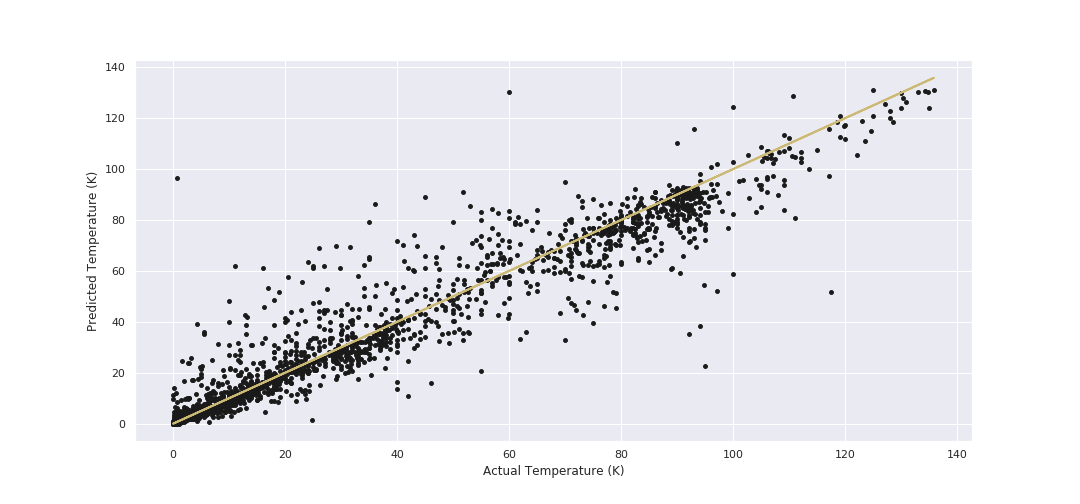

In [31]:
plt.figure(figsize = (15,7))
plt.scatter(ytest, y_model, s = 15, c = 'k')
plt.plot(ytest,ytest, c = 'y', linewidth=2.0)
plt.xlabel('Actual Temperature (K)')
plt.ylabel('Predicted Temperature (K)')

(-40, 40)

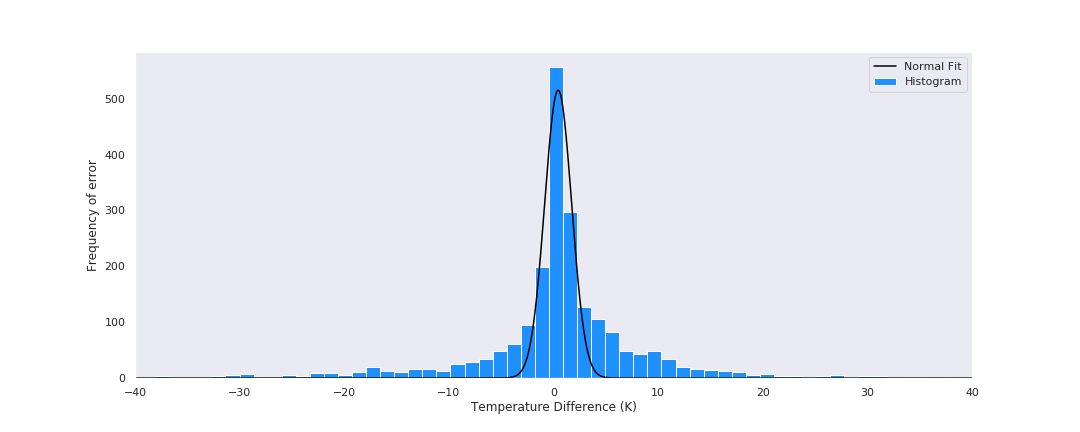

In [32]:
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)

x=ytest-y_model

plt.figure(figsize=(15,6))
bin_heights, bin_borders, _ = plt.hist(x, bins=125, label='Histogram',color='dodgerblue')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='Normal Fit',color='black')
plt.grid()
plt.xlabel('Temperature Difference (K)')
plt.legend()
plt.ylabel('Frequency of error')
plt.xlim(-40,40)

#Adapted from https://stackoverflow.com/questions/35544233/fit-a-curve-to-a-histogram-in-python

# Error

- A Gaussian distribution of the error would mean equal error on both sides of the centre, zero Kelvin. However this is only vaguely appropriate for the Random Forest, Multi-layer percepton and Linear Regression models. The Random Forest and MLP models have very sharp distributions whilst the linear regression is much wider. There seems to be a gaussian distrubution in the other models but they are heavily weighted to one side with many outliers, showing how the models preferably over or under estimate the critical temperatures.
- A normal gaussian distribution has been fitted and plotted over the top of each histogram to more easily see the outliers.
- This is particulalry prominant in the Gaussian and multi-layer perceptron models. The Gaussian model is clearly skewed toward over estimating a lot of the temperatures and the multi layer is underestimating.
- The peak is around 0 for all the histograms. This is good as it shows the difference between the test temperature (actual) and the model temperature (predicted), therefore an error (or difference) of around 0 means it has been predicted well.
- The graphs for each model show where the predicted values lie against the acyual values. There is a large spread from the true value line. However for the Random Forest model the values begin to group closer to the line, showing a large improvment in the predicted values, specially when compared to the Gaussian models plot.

# Super-conducting Discussion

- The best result is from the Random Forest Regressor. This gives a root mean squared error of 9.5, this shows on average the predicted critical temperatrure values are 9.5 Kelvin from true value. This shows it is getting the closest, overall, to the true answers.
- However in the case of superconductors critical temperatures, being even 1 or 2 kelvin from the true value will yeild a bad result, so the error here is far more substantial than in other cases.
- With more precise optimisation, it is possible that better values could be found, as shown with the Random Forest Regressor this could have great promise.
- If the models were told that having a value of below 0 Kelvin is not possible it could improve results greatly, especially for superconducting materials that require sub liquid helium temperatures.

- This could be used to predict the critical temperatures of superconductors at high and low temperatures. A dataset of arbitrary materials could be formed, then a model that has been trained on real data could predict the critical temperatures of the randomly chosen properties of each material. This could give temperatures close to their real critial temperature and therefore be useful as new superconductors could be found with relatively low effort required.
